# Prediksi Kualitas Udara di Jakarta Berdasarkan Data Indeks Standar Pencemar Udara (ISPU) dengan mengkomparasi model klasifikasi menggunakan naive bayes dan ordinal logistic regression


Variable Dependennya Kualitas Udara sedangkan variable independennya Data polutan dari ISPU yaitu SO2, NO2, CO ,O3, PM10, PM25


PERLU RESAMPLE

link dataset : https://katalog.data.go.id/dataset/data-indeks-standar-pencemar-udara-ispu-di-provinsi-dki-jakarta1

1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. pm25 : Partikulat salah satu parameter yang diukur
5. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
6. co : Carbon Monoksida salah satu parameter yand diukur
7. o3 : Ozon salah satu parameter yang diukur
8. no2 : NItrogen dioksida salah satu parameter yang diukur
9. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
10. critical : Parameter yang hasil pengukurannya paling tinggi
11. categori : Kategori hasil perhitungan indeks standar pencemaran udara







## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("/content/anmul_final.csv", sep=',')
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,kategori
0,25/02/2023,DKI5 Kebon Jeruk Jakarta Barat,35,0,13,12,31,18,35,PM10,BAIK
1,26/02/2023,DKI5 Kebon Jeruk Jakarta Barat,23,0,14,9,32,11,32,O3,BAIK
2,27/02/2023,DKI5 Kebon Jeruk Jakarta Barat,20,0,13,8,33,13,33,O3,BAIK
3,28/02/2023,DKI5 Kebon Jeruk Jakarta Barat,30,0,21,11,28,18,30,PM10,BAIK
4,01/03/2023,DKI1 Bunderan HI,38,44,50,8,19,27,50,3,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
1799,26/11/2023,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1800,27/11/2023,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1801,28/11/2023,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1802,29/11/2023,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


In [ ]:
df.shape

(1804, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1804 non-null   object
 1   stasiun   1804 non-null   object
 2   pm10      1804 non-null   int64 
 3   pm25      1804 non-null   int64 
 4   so2       1804 non-null   int64 
 5   co        1804 non-null   int64 
 6   o3        1804 non-null   int64 
 7   no2       1804 non-null   int64 
 8   max       1804 non-null   int64 
 9   critical  1804 non-null   object
 10  kategori  1804 non-null   object
dtypes: int64(7), object(4)
memory usage: 155.2+ KB


In [ ]:
df.drop(['tanggal', 'stasiun', 'critical'], axis=1)

,pm10,pm25,so2,co,o3,no2,max,kategori
0,35,0,13,12,31,18,35,BAIK
1,23,0,14,9,32,11,32,BAIK
2,20,0,13,8,33,13,33,BAIK
3,30,0,21,11,28,18,30,BAIK
4,38,44,50,8,19,27,50,BAIK
...,...,...,...,...,...,...,...,...
1799,48,71,33,21,44,20,71,SEDANG
1800,51,76,32,18,53,19,76,SEDANG
1801,56,88,33,20,48,21,88,SEDANG
1802,56,88,32,18,56,18,88,SEDANG


# **PREPROCESSING**

***Describe Statistics***

In [ ]:
print(df.describe())

              pm10         pm25          so2           co           o3  \
count  1804.000000  1804.000000  1804.000000  1804.000000  1804.000000   
mean     46.745565    65.973392    37.684590    12.489468    28.138581   
std      22.307589    35.565152    13.860799     6.742174    13.168083   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      35.000000    50.000000    26.000000     8.000000    19.000000   
50%      52.000000    73.000000    38.000000    11.000000    26.000000   
75%      62.000000    88.000000    51.000000    16.000000    35.000000   
max     163.000000   287.000000    89.000000    55.000000    81.000000   

               no2          max  
count  1804.000000  1804.000000  
mean     17.350333    74.315410  
std       9.056261    23.927575  
min       0.000000    20.000000  
25%      12.000000    57.000000  
50%      17.000000    74.000000  
75%      23.000000    88.000000  
max      53.000000   287.000000  


Contoh Interpretasi Hasil Statistik dari faktor polutan


*   pm10: Rata-rata 46.54 μg/m³ dengan variasi yang besar (std deviasi 22.47). Nilai maksimum sangat tinggi (163 μg/m³) menunjukkan adanya beberapa hari dengan polusi PM10 yang sangat tinggi.
*   pm25: Rata-rata 65.68 μg/m³ dengan variasi yang signifikan (std deviasi 35.76). Nilai maksimum 287 μg/m³ menunjukkan adanya beberapa hari dengan polusi PM2.5 yang ekstrem.

*   so2: Rata-rata 37.52 μg/m³. Distribusi data cukup simetris dengan median 38 μg/m³ dan standar deviasi 14.05.

*   co: Rata-rata 12.43 μg/m³ dengan nilai minimum 0 dan maksimum 55 μg/m³. Variasi sedang (std deviasi 6.78).
*   o3: Rata-rata 28.01 μg/m³, nilai minimum 0 dan maksimum 81 μg/m³, dengan variasi yang lebih rendah dibandingkan pm25 dan pm10.

*   no2: Rata-rata 17.27 μg/m³ dengan variasi yang lebih kecil (std deviasi 9.11), menunjukkan distribusi yang lebih seragam



In [ ]:
counts = df['kategori'].value_counts()
print(counts)

kategori
SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
SANGAT TIDAK SEHAT       3
Name: count, dtype: int64


In [ ]:
# Menghapus baris yang memiliki nilai "TIDAK ADA DATA" di kolom 'kategori' secara langsung
df = df[df['kategori'] != "TIDAK ADA DATA"]

In [ ]:
counts = df['kategori'].value_counts()
print(counts)

kategori
SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
SANGAT TIDAK SEHAT       3
Name: count, dtype: int64


In [ ]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'kategori'],
      dtype='object')

In [ ]:
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
kategori    0
dtype: int64

Visualisasi Data

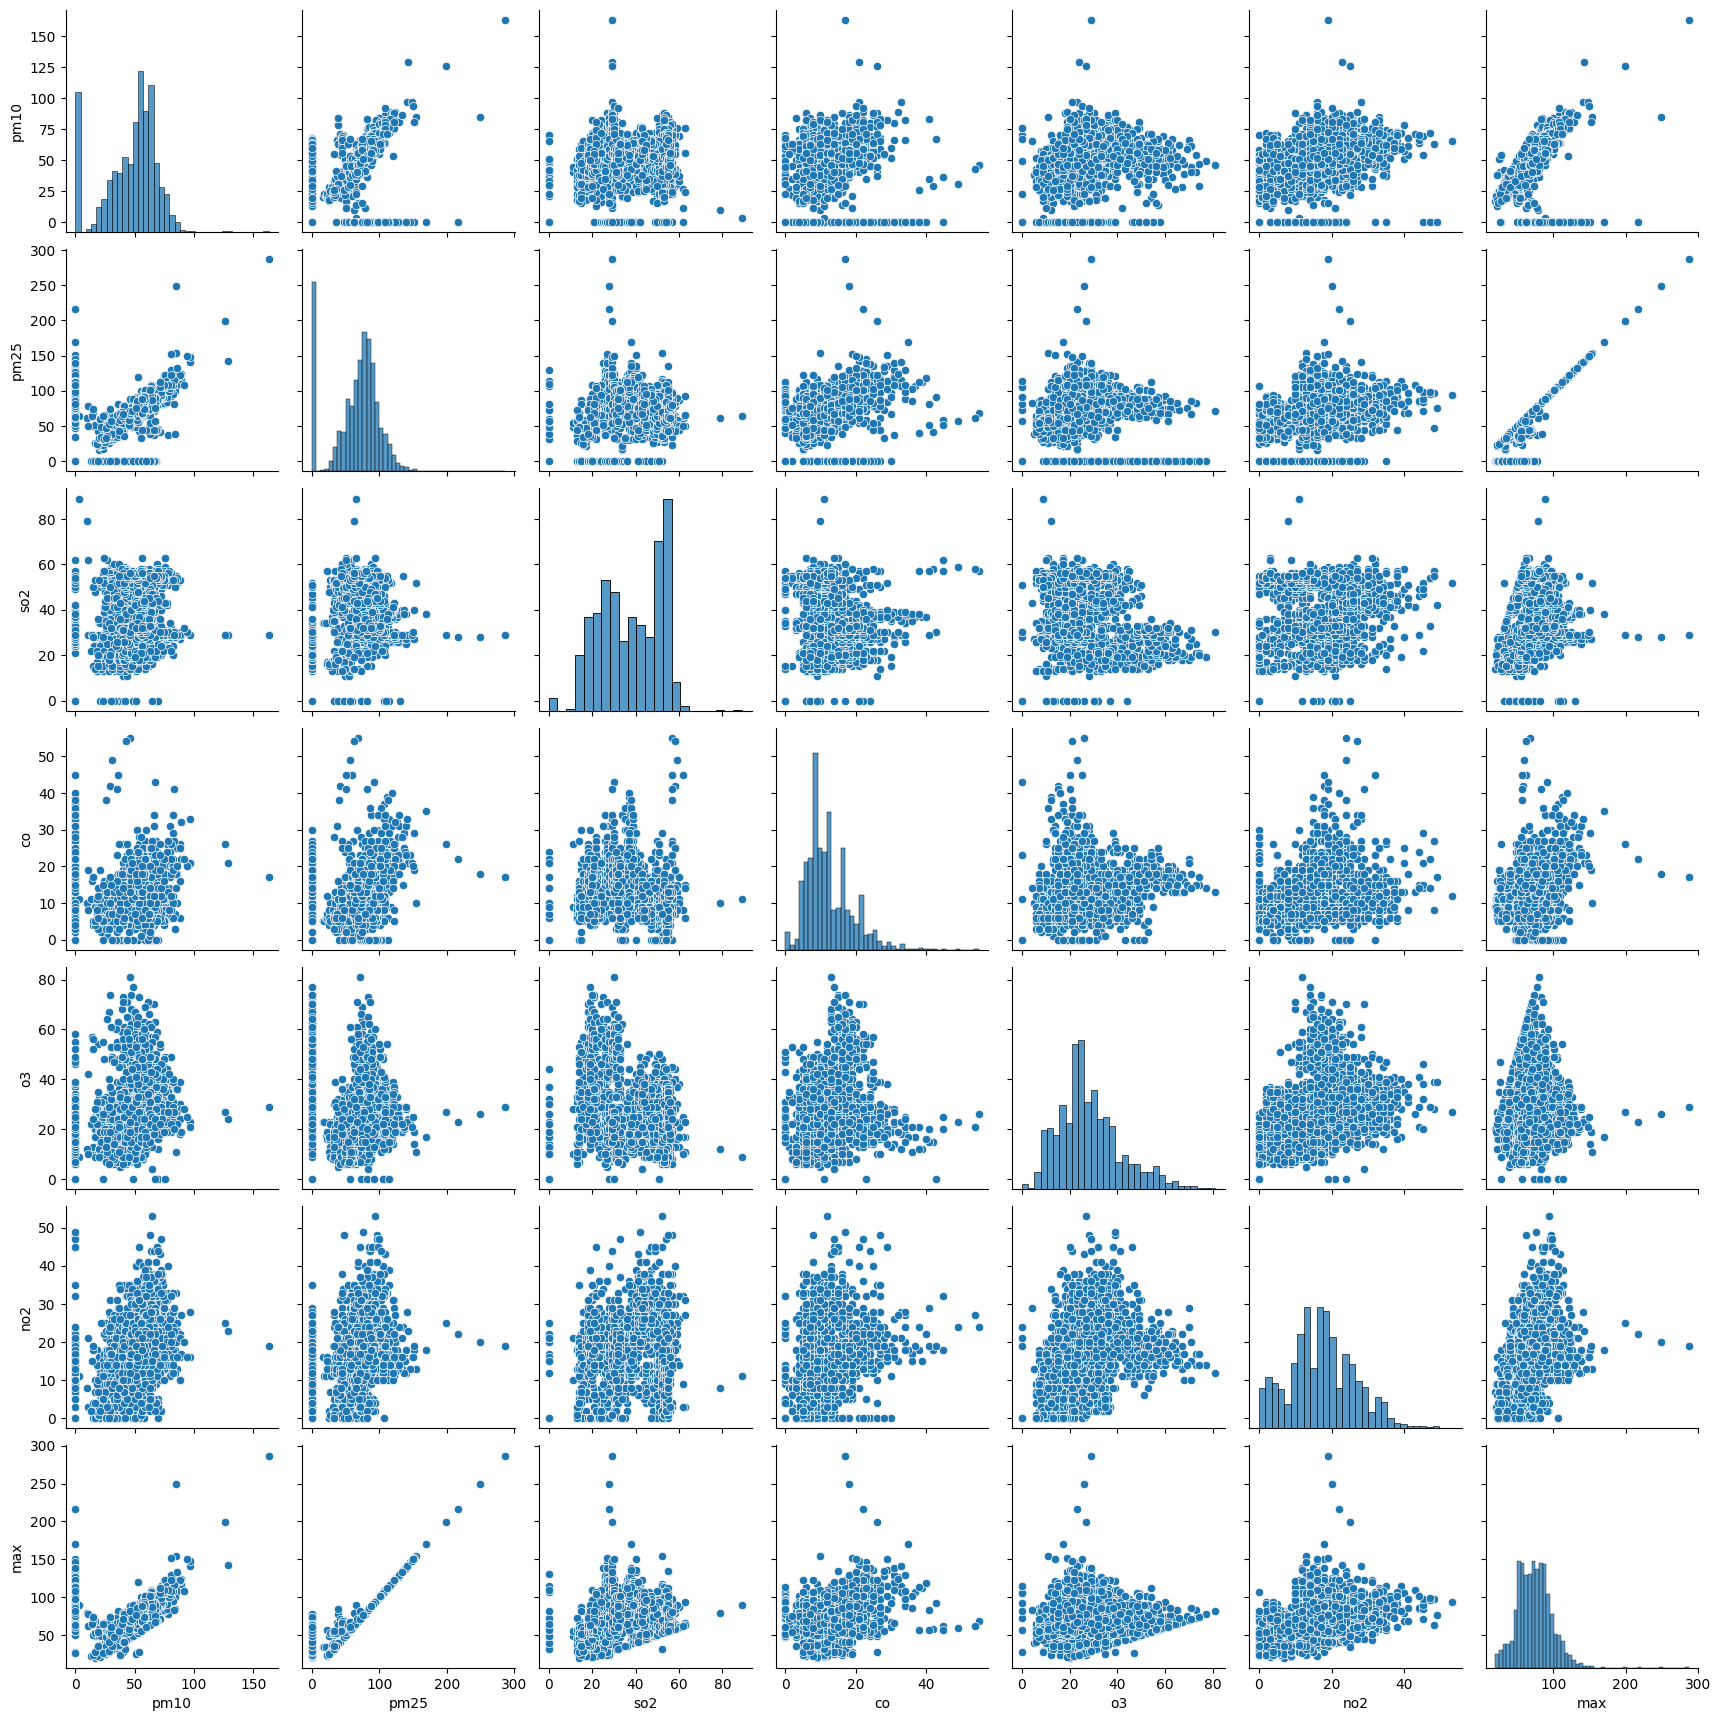

In [ ]:
sns.pairplot(df)
plt.show()

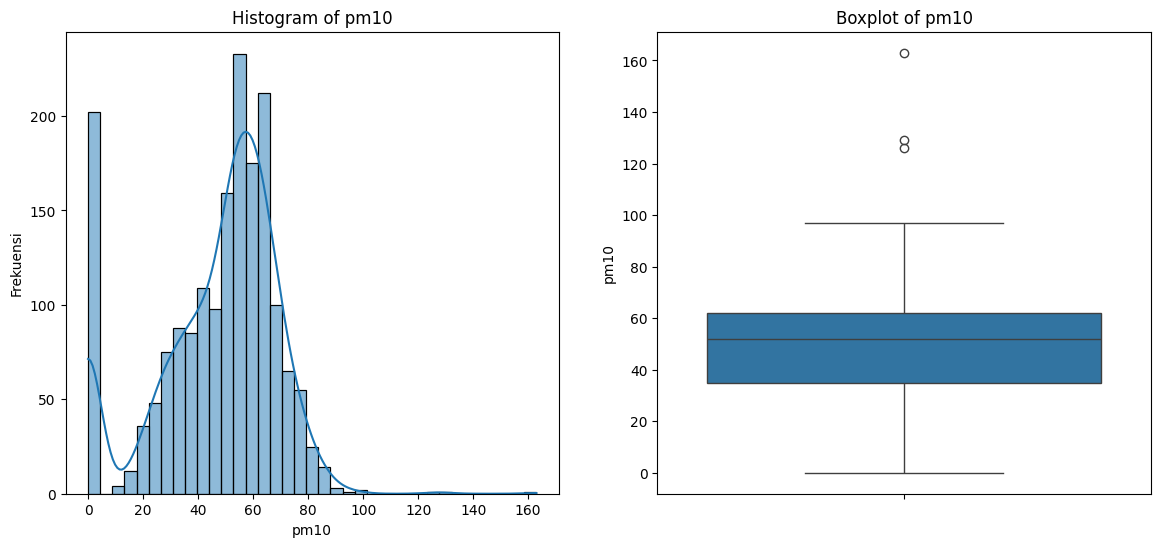

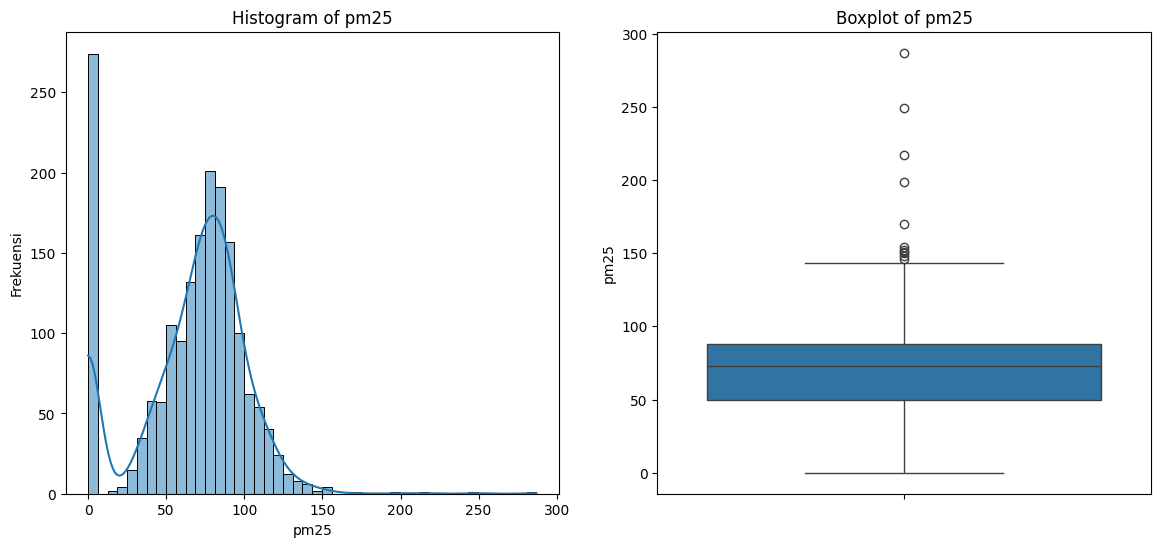

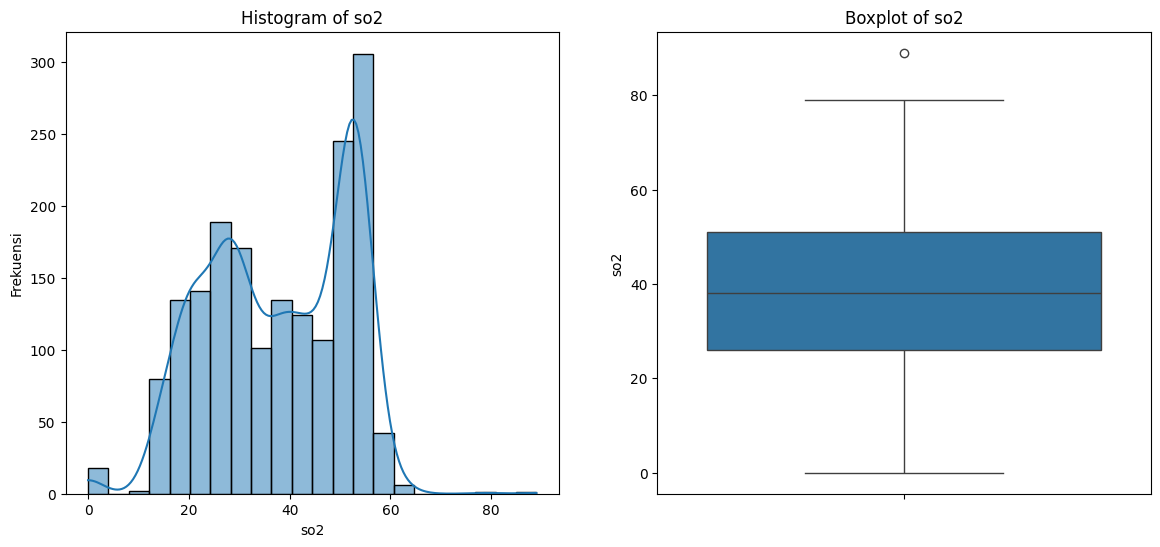

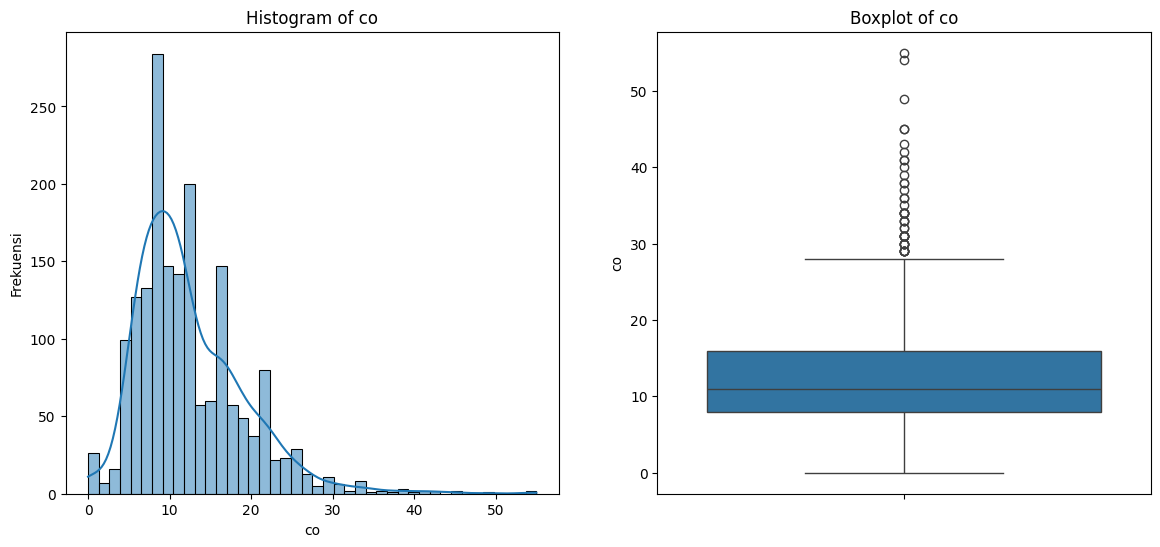

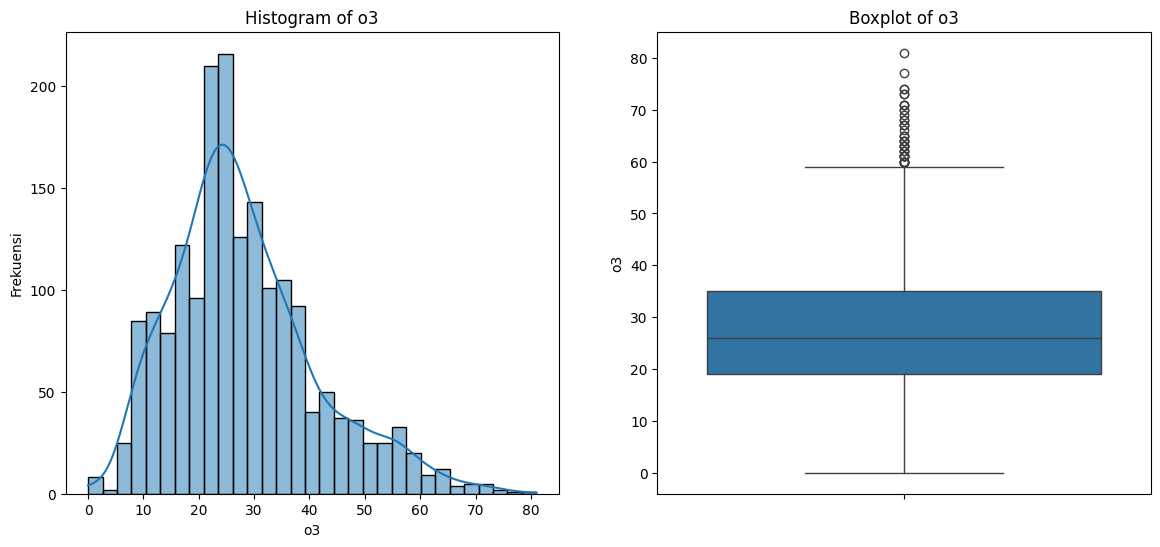

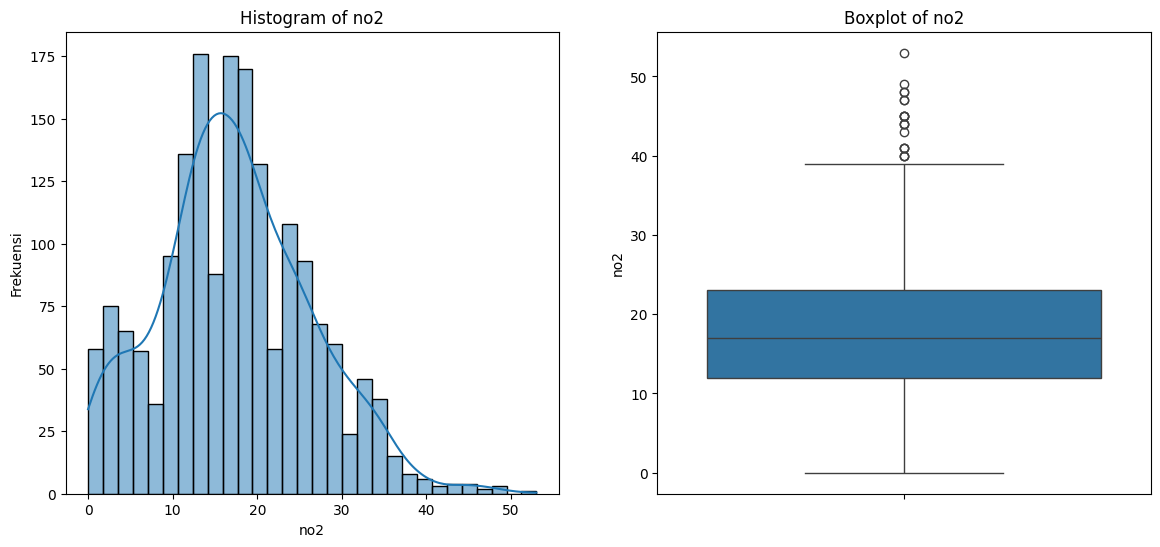

In [ ]:
polutan = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

for polusi in polutan:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[polusi], kde=True)
    plt.title(f'Histogram of {polusi}')
    plt.xlabel(polusi)
    plt.ylabel('Frekuensi')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[polusi])
    plt.title(f'Boxplot of {polusi}')
    plt.ylabel(polusi)
    plt.show()

KDE Plot

**Uji matrix**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


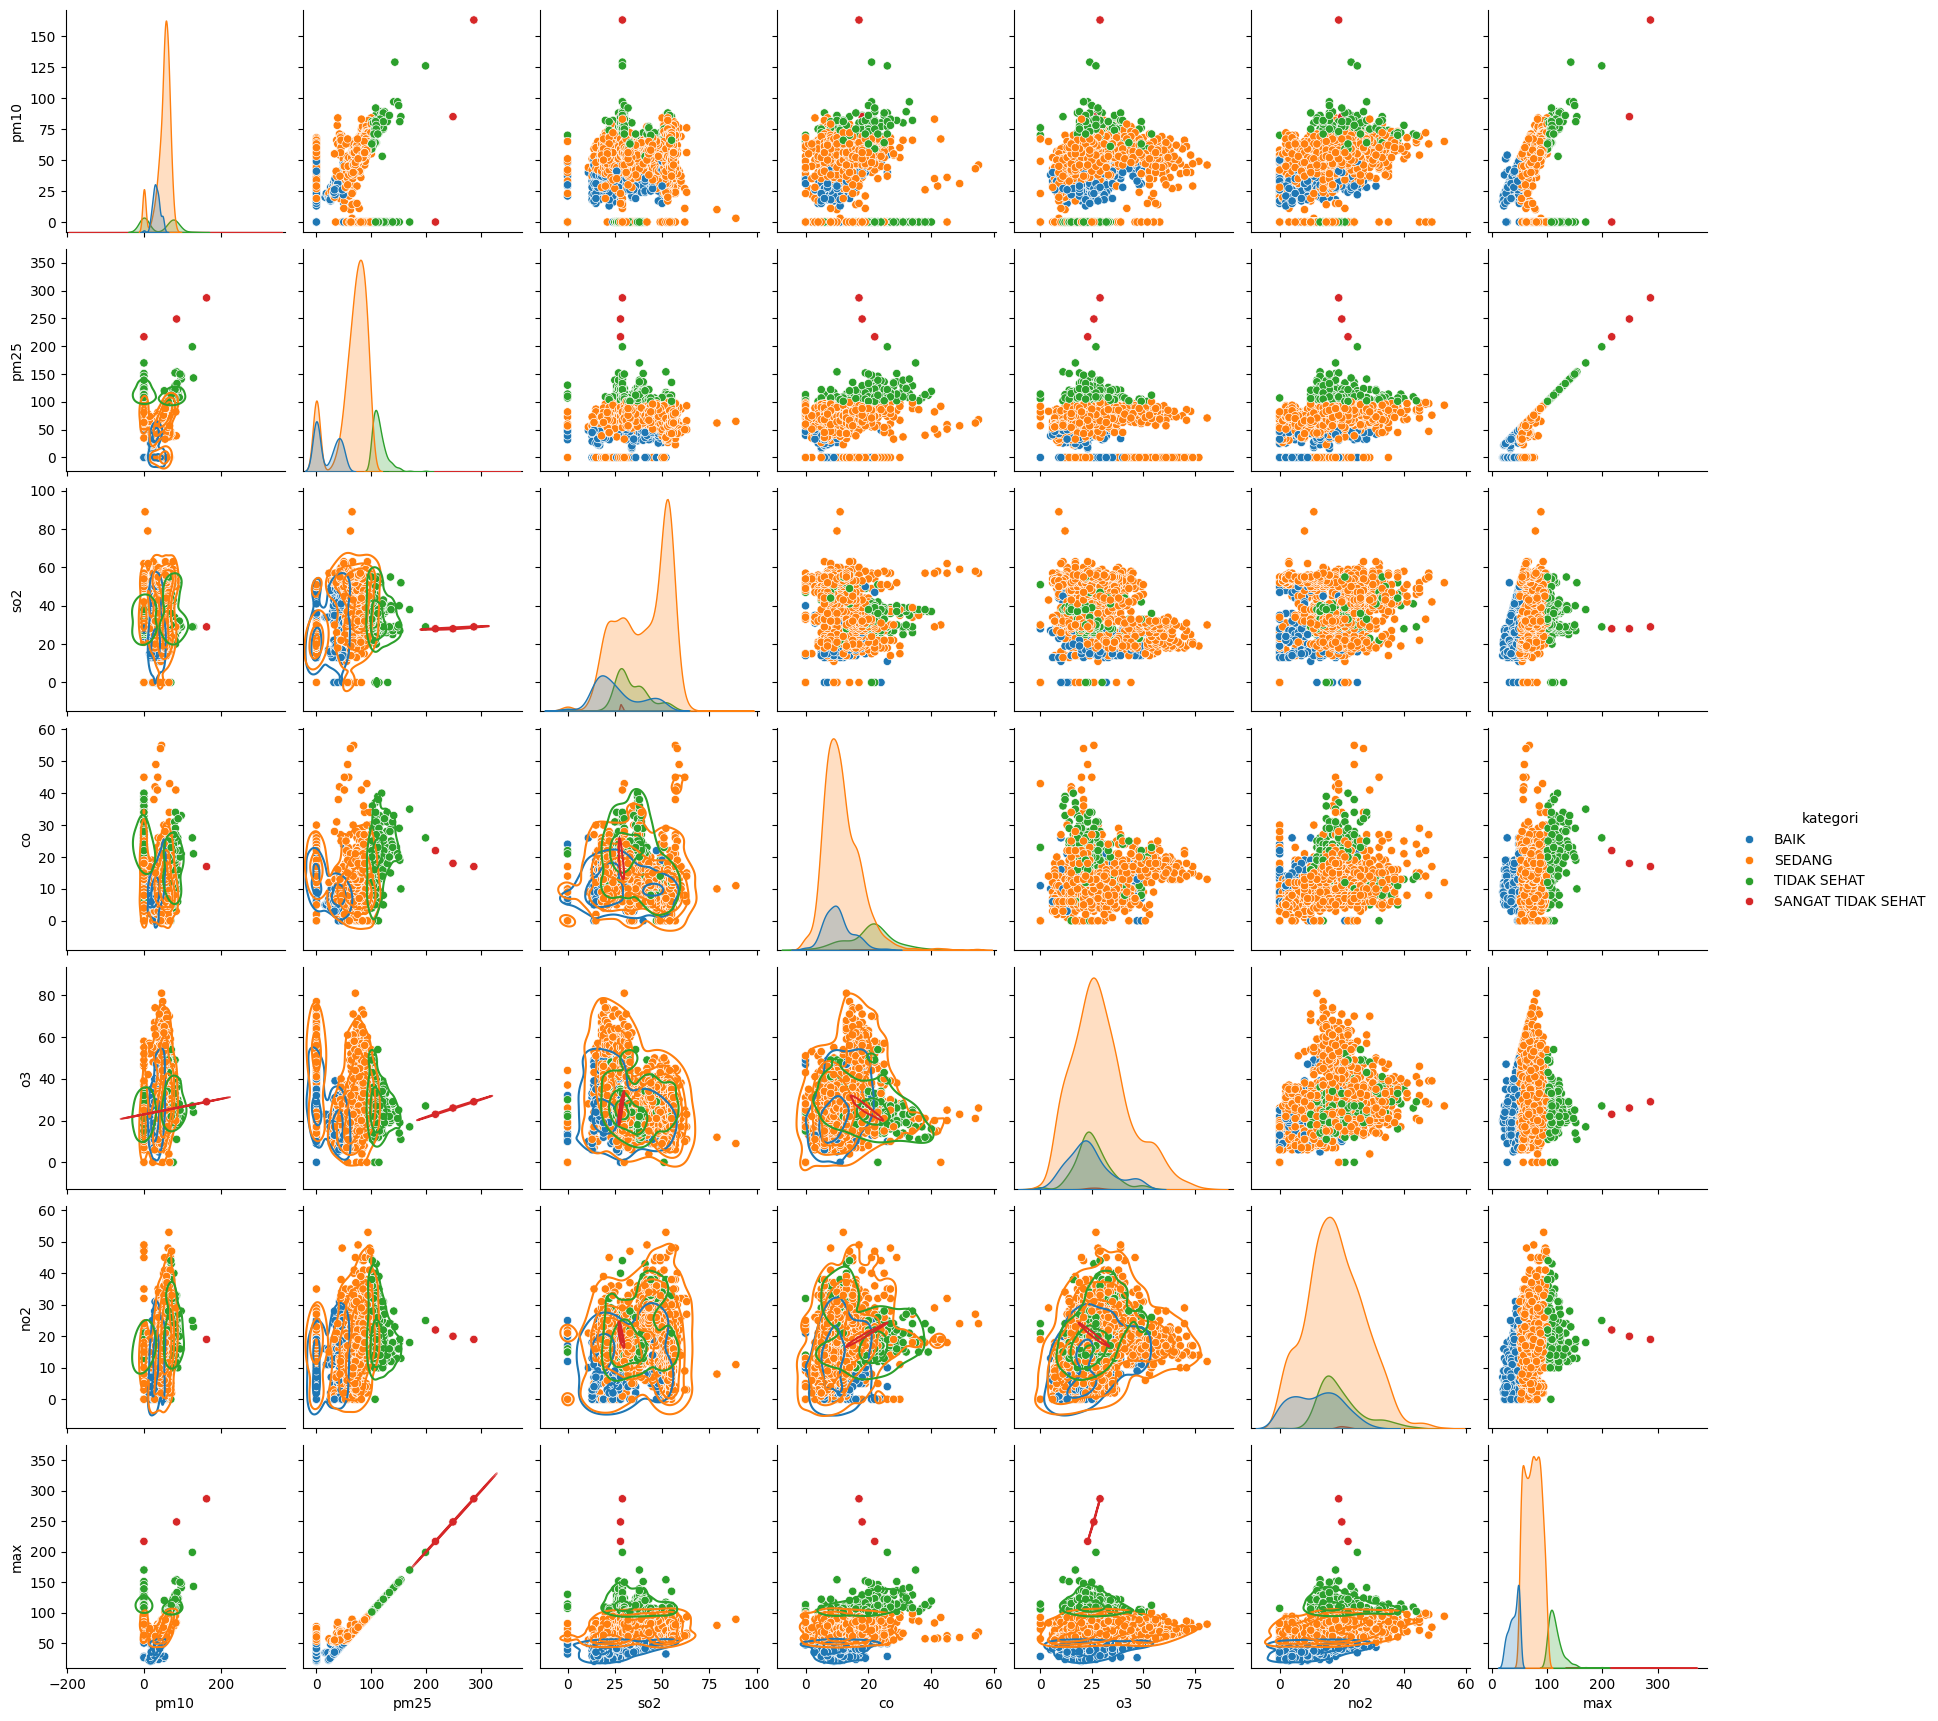

In [ ]:
kombinasi = sns.pairplot(df, hue='kategori')
kombinasi.map_lower(sns.kdeplot, levels=4, color="0.2")
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Daftar semua fitur numerik
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Membuat matriks korelasi
correlation_matrix = df[numerical_features].corr()

# Inisialisasi matriks untuk menyimpan nilai korelasi dan p-value
correlation_values = np.zeros((len(numerical_features), len(numerical_features)))
p_values = np.zeros((len(numerical_features), len(numerical_features)))

# Melakukan uji korelasi untuk setiap pasangan fitur
for i, feature1 in enumerate(numerical_features):
    for j, feature2 in enumerate(numerical_features):
        if i != j:  # Skip korelasi fitur dengan dirinya sendiri
            correlation, p_value = pearsonr(df[feature1], df[feature2])
            correlation_values[i, j] = correlation
            p_values[i, j] = p_value

# Membuat DataFrame untuk menampilkan hasil
correlation_df = pd.DataFrame(correlation_values, index=numerical_features, columns=numerical_features)
p_values_df = pd.DataFrame(p_values, index=numerical_features, columns=numerical_features)

# Menampilkan matriks korelasi dan p-value
print("Correlation Matrix:")
print(correlation_df)
print("\n")
print("P-Value Matrix:")
print(p_values_df)


Correlation Matrix:
          pm10      pm25       so2        co        o3       no2       max
pm10  0.000000  0.168721  0.172298 -0.177548  0.267636  0.292413  0.219525
pm25  0.168721  0.000000  0.321324  0.109282 -0.163132  0.277946  0.879913
so2   0.172298  0.321324  0.000000 -0.204693 -0.268318  0.049077  0.170630
co   -0.177548  0.109282 -0.204693  0.000000  0.106849  0.207647  0.295082
o3    0.267636 -0.163132 -0.268318  0.106849  0.000000  0.289518  0.055115
no2   0.292413  0.277946  0.049077  0.207647  0.289518  0.000000  0.311604
max   0.219525  0.879913  0.170630  0.295082  0.055115  0.311604  0.000000


P-Value Matrix:
              pm10          pm25           so2            co            o3  \
pm10  0.000000e+00  5.473439e-13  1.729581e-13  3.047777e-14  5.760640e-31   
pm25  5.473439e-13  0.000000e+00  1.325207e-44  3.282206e-06  3.152561e-12   
so2   1.729581e-13  1.325207e-44  0.000000e+00  1.618274e-18  4.030046e-31   
co    3.047777e-14  3.282206e-06  1.618274e-18  0.

In [ ]:
from scipy.stats import pearsonr

#uji coba
corr_pm10_pm25, p_pm10_pm25 = pearsonr(df['pm10'], df['pm25'])
corr_pm10_so2, p_pm10_so2 = pearsonr(df['pm10'], df['so2'])
corr_pm25_so2, p_pm25_so2 = pearsonr(df['pm25'], df['so2'])

# Print the results
print(f'Korelasi antara PM10 dan PM2.5: {corr_pm10_pm25:.2f}, p-value: {p_pm10_pm25:.2f}')
if p_pm10_pm25 < 0.05:
    print("Tolak hipotesis nol, ada korelasi yang signifikan antara PM10 dan PM2.5")
else:
    print("Terima hipotesis nol, tidak ada korelasi yang signifikan antara PM10 dan PM2.5")

print(f'Korelasi antara PM10 dan SO2: {corr_pm10_so2:.2f}, p-value: {p_pm10_so2:.2f}')
if p_pm10_so2 < 0.05:
    print("Tolak hipotesis nol, ada korelasi yang signifikan antara PM10 dan SO2")
else:
    print("Terima hipotesis nol, tidak ada korelasi yang signifikan antara PM10 dan SO2")

print(f'Korelasi antara PM2.5 dan SO2: {corr_pm25_so2:.2f}, p-value: {p_pm25_so2:.2f}')
if p_pm25_so2 < 0.05:
    print("Tolak hipotesis nol, ada korelasi yang signifikan antara PM2.5 dan SO2")
else:
    print("Terima hipotesis nol, tidak ada korelasi yang signifikan antara PM2.5 dan SO2")

Korelasi antara PM10 dan PM2.5: 0.17, p-value: 0.00
Tolak hipotesis nol, ada korelasi yang signifikan antara PM10 dan PM2.5
Korelasi antara PM10 dan SO2: 0.17, p-value: 0.00
Tolak hipotesis nol, ada korelasi yang signifikan antara PM10 dan SO2
Korelasi antara PM2.5 dan SO2: 0.32, p-value: 0.00
Tolak hipotesis nol, ada korelasi yang signifikan antara PM2.5 dan SO2


In [ ]:
# Handle missing
df.fillna(0, inplace=True)

In [ ]:
df_fix = df.drop(['tanggal', 'stasiun', 'critical'], axis=1)

In [ ]:
df_fix

,pm10,pm25,so2,co,o3,no2,max,kategori
0,35,0,13,12,31,18,35,BAIK
1,23,0,14,9,32,11,32,BAIK
2,20,0,13,8,33,13,33,BAIK
3,30,0,21,11,28,18,30,BAIK
4,38,44,50,8,19,27,50,BAIK
...,...,...,...,...,...,...,...,...
1799,48,71,33,21,44,20,71,SEDANG
1800,51,76,32,18,53,19,76,SEDANG
1801,56,88,33,20,48,21,88,SEDANG
1802,56,88,32,18,56,18,88,SEDANG


**UJI KORELASI**

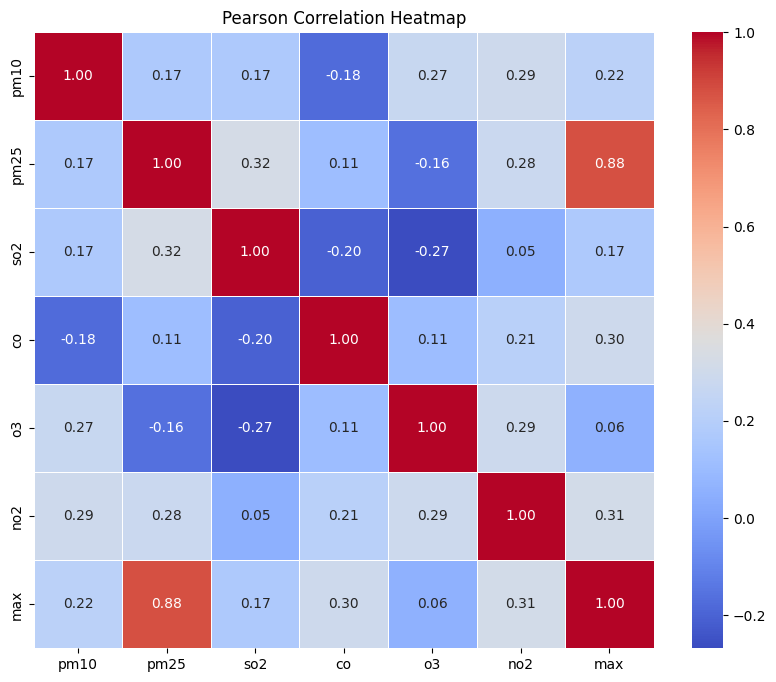

In [ ]:
df_korelasi = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']]

# korelasi matrix metode pearson
corr_matrix = df_korelasi.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

## Resample Data (**Variabel Reduction**)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Membagi data menjadi set pelatihan dan pengujian
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

print("\nData Pelatihan:")
print(train_df['kategori'].value_counts())
print("\nData Pengujian:")
print(test_df['kategori'].value_counts())


Data Pelatihan:
kategori
SEDANG                936
BAIK                  176
TIDAK SEHAT           148
SANGAT TIDAK SEHAT      2
Name: count, dtype: int64

Data Pengujian:
kategori
SEDANG                422
BAIK                   60
TIDAK SEHAT            59
SANGAT TIDAK SEHAT      1
Name: count, dtype: int64


In [13]:
target_sample_size = 500
labels = train_df['kategori'].unique()
resampled_dfs = []

In [14]:
for label in labels:
    label_df = train_df[train_df['kategori'] == label]
    if len(label_df) > target_sample_size:
        label_df = resample(label_df,
                            replace=False,
                            n_samples=target_sample_size,
                            random_state=42)
    else:
        label_df = resample(label_df,
                            replace=True,
                            n_samples=target_sample_size,
                            random_state=42)
    resampled_dfs.append(label_df)

In [15]:
# Menggabungkan kembali data pelatihan yang telah diresample
train_df_resampled = pd.concat(resampled_dfs)

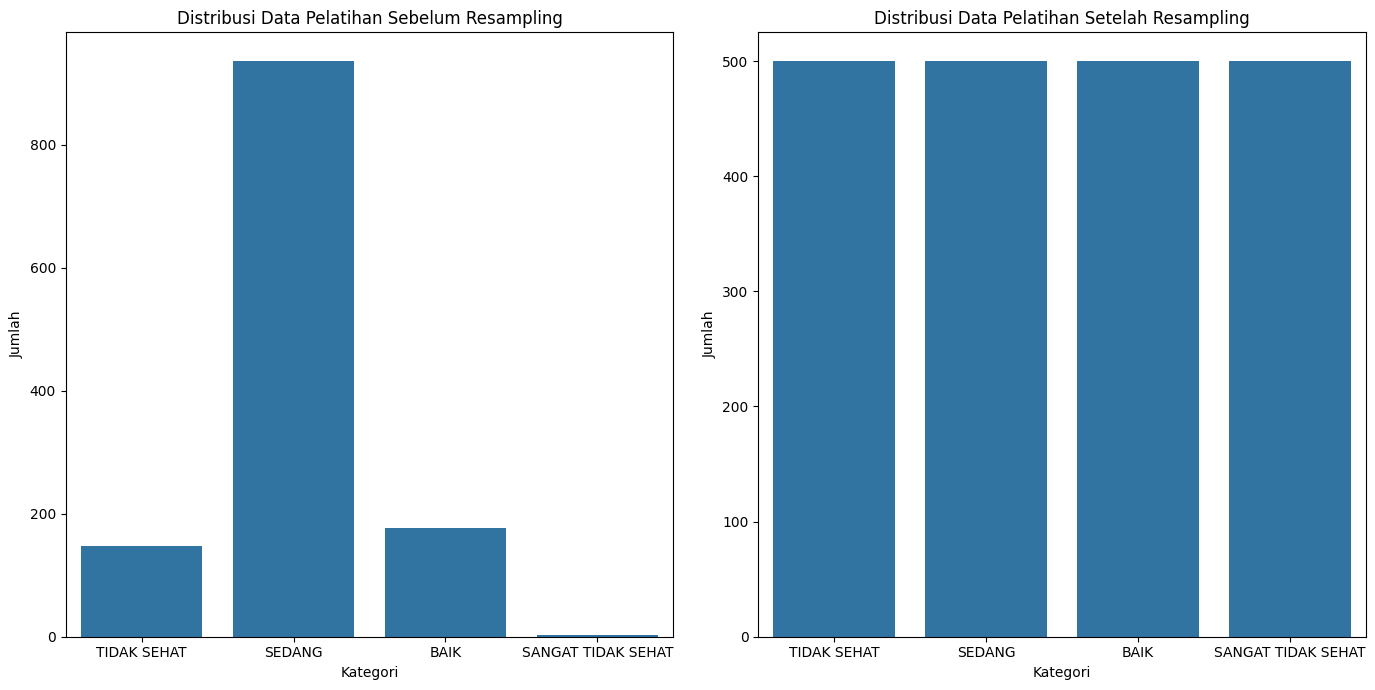

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(ax=axes[0], x='kategori', data=train_df)
axes[0].set_title('Distribusi Data Pelatihan Sebelum Resampling')
axes[0].set_xlabel('Kategori')
axes[0].set_ylabel('Jumlah')
sns.countplot(ax=axes[1], x='kategori', data=train_df_resampled)
axes[1].set_title('Distribusi Data Pelatihan Setelah Resampling')
axes[1].set_xlabel('Kategori')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
# train_df_resampled.to_csv('train_data_resample.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df_resampled['kategori_encoded'] = le.fit_transform(train_df_resampled['kategori'])
test_df['kategori_encoded'] = le.transform(test_df['kategori'])

# Menyimpan data pelatihan dan pengujian ke file CSV
# train_df_resampled.to_csv('train_data_resampled_encoded.csv', index=False)
# test_df.to_csv('test_data_encoded.csv', index=False)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # asumsikan berdasarkan analisis korelasi
# features = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]
# target = df['kategori']

# # Encoding the target variable
# le = LabelEncoder()
# target_encoded = le.fit_transform(target)

# kategori_mapping = {
#     'BAIK': 0,
#     'SEDANG': 1,
#     'TIDAK SEHAT': 2,
#     'SANGAT TIDAK SEHAT': 3,
# }

# # Menggunakan map untuk mengonversi kategori ke nilai numerik
# df['kategori_encoded'] = df['kategori'].map(kategori_mapping)


# **Metode**

## Estimasi Parameter

In [4]:
pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=30a0af52b266b47d4f2d0c8431d8135ebd9c6597a0d3cd91328b1238ef7a527d
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from mord import LogisticAT
from mord import LogisticIT
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
features = ["pm10", "pm25", "so2", "co", "o3", "no2"]
X = train_df_resampled[features]
y = train_df_resampled['kategori_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

**STANDARISASI DATA**

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# normalisasi = MinMaxScaler()
# X_train_scaled = normalisasi.fit_transform(X_train)
# X_test_scaled = normalisasi.transform(X_test)

**MODEL**

1. Naive Bayes

In [23]:
# 1. Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)

In [24]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Estimasi parameter
means = gnb.theta_  # Mean
# variances = gnb.var_  # Varian
priors = gnb.class_prior_  # Prior

print("Mean dari fitur perkelas:")
print(means)

print("\nProbabilitas dari fitur perkelas:")
print(priors)

Mean dari fitur perkelas:
[[-0.39568796 -1.00431799 -0.48005935 -0.7497673  -0.29887938 -0.75075206]
 [ 0.58871289  1.56648318 -0.34173149  0.61204487 -0.00518699  0.40194942]
 [-0.00608845 -0.50684799  0.66494232 -0.47048865  0.3337232   0.10073343]
 [-0.16981828  0.01707923  0.13521166  0.66601457 -0.03782706  0.27189101]]

Probabilitas dari fitur perkelas:
[0.25357143 0.24357143 0.25857143 0.24428571]


In [25]:
class_mapping = {
    0: 'BAIK',
    1: 'SEDANG',
    2: 'TIDAK SEHAT',
    3: 'SANGAT TIDAK SEHAT',
}
y_test_mapped = [class_mapping[label] for label in y_test]
nb_predictions_mapped = [class_mapping[label] for label in nb_predictions]
print("Laporan Evaluasi Model Gaussian Naive Bayes:")
print(classification_report(y_test_mapped, nb_predictions_mapped))

Laporan Evaluasi Model Gaussian Naive Bayes:
                    precision    recall  f1-score   support

              BAIK       0.94      0.97      0.96       145
SANGAT TIDAK SEHAT       0.96      0.83      0.89       158
            SEDANG       0.99      1.00      0.99       159
       TIDAK SEHAT       0.81      0.89      0.85       138

          accuracy                           0.92       600
         macro avg       0.92      0.92      0.92       600
      weighted avg       0.93      0.92      0.92       600



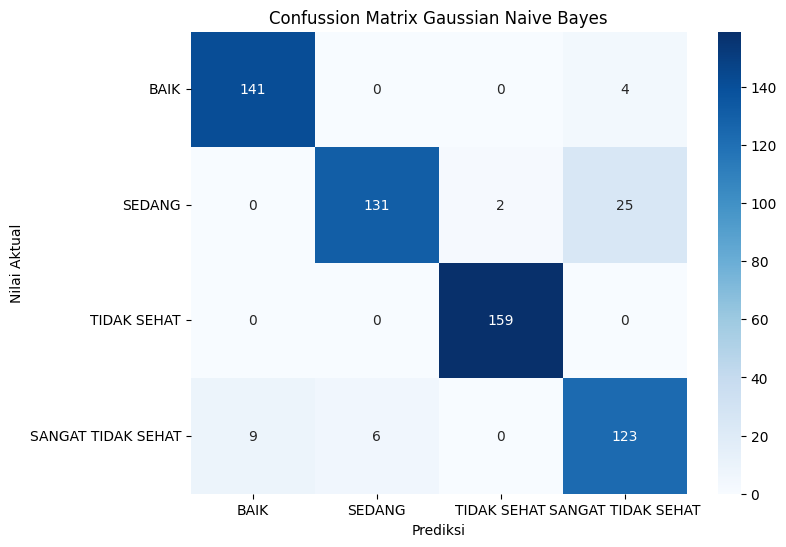

In [34]:
conf_matrix = confusion_matrix(y_test_mapped, nb_predictions_mapped)

# Plot matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confussion Matrix Gaussian Naive Bayes')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

nb_mse = mean_squared_error(y_test, nb_predictions)
nb_rmse = np.sqrt(nb_mse)
nb_mae = mean_absolute_error(y_test, nb_predictions)

print(f'Gaussian Naive Bayes MSE: {nb_mse}')
print(f'Gaussian Naive Bayes RMSE: {nb_rmse}')
print(f'Gaussian Naive Bayes MAE: {nb_mae}')

Gaussian Naive Bayes MSE: 0.15166666666666667
Gaussian Naive Bayes RMSE: 0.3894440481849308
Gaussian Naive Bayes MAE: 0.10166666666666667


In [26]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train_scaled, y_train)
bernoulli_predictions = bernoulli_model.predict(X_test_scaled)

In [29]:
class_mapping = {
    0: 'BAIK',
    1: 'SEDANG',
    2: 'TIDAK SEHAT',
    3: 'SANGAT TIDAK SEHAT',
}
y_test_mapped = [class_mapping[label] for label in y_test]
bernoulli_predictions_mapped = [class_mapping[label] for label in bernoulli_predictions]
print("Laporan Evaluasi Model Bernoulli Naive Bayes:")
print(classification_report(y_test_mapped, bernoulli_predictions_mapped))

Laporan Evaluasi Model Bernoulli Naive Bayes:
                    precision    recall  f1-score   support

              BAIK       0.75      0.90      0.82       145
SANGAT TIDAK SEHAT       0.70      0.63      0.67       158
            SEDANG       0.91      1.00      0.95       159
       TIDAK SEHAT       0.71      0.56      0.62       138

          accuracy                           0.78       600
         macro avg       0.77      0.77      0.77       600
      weighted avg       0.77      0.78      0.77       600



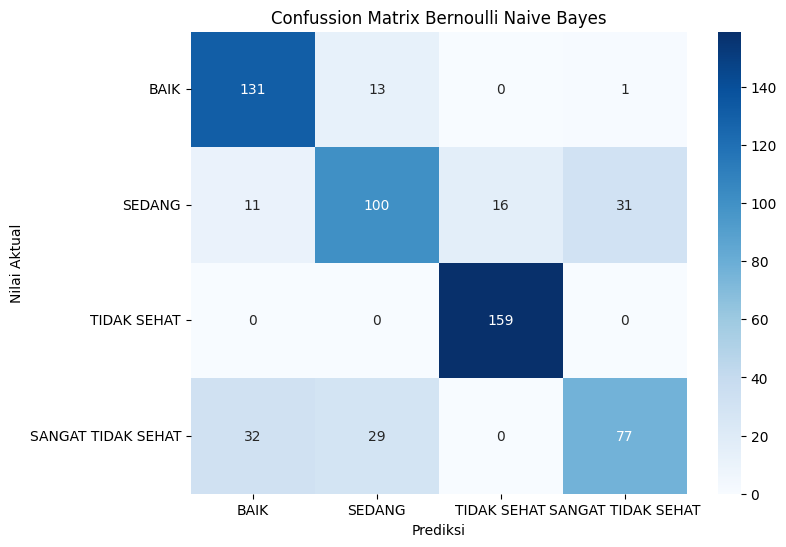

In [36]:
conf_matrix = confusion_matrix(y_test_mapped, bernoulli_predictions_mapped)

# Plot matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confussion Matrix Bernoulli Naive Bayes')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

bernoulli_mse = mean_squared_error(y_test, bernoulli_predictions)
bernoulli_rmse = np.sqrt(nb_mse)
bernoulli_mae = mean_absolute_error(y_test, bernoulli_predictions)

print(f'Bernoulli Naive Bayes MSE: {bernoulli_mse}')
print(f'Bernoulli Naive Bayes RMSE: {bernoulli_rmse}')
print(f'Bernoulli Naive Bayes MAE: {bernoulli_mae}')

Bernoulli Naive Bayes MSE: 0.7866666666666666
Bernoulli Naive Bayes RMSE: 0.3894440481849308
Bernoulli Naive Bayes MAE: 0.38333333333333336


**2. Ordinal Logistic Regression**

Pr(yi | x) = (i – w.x)

Dimana
- = fungsi tautan terbalik
- w = vektor koefisien panjang-p
- = sekumpulan ambang batas dengan properti θ1 < θ2 < ... < θK-1.

In [39]:
# model ordinal logistic regression
mod_prob = OrderedModel(y_train, X_train_scaled, distr='logit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

Optimization terminated successfully.
         Current function value: 1.155387
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                             OrderedModel Results                             
Dep. Variable:       kategori_encoded   Log-Likelihood:                -1617.5
Model:                   OrderedModel   AIC:                             3253.
Method:            Maximum Likelihood   BIC:                             3300.
Date:                Mon, 10 Jun 2024                                         
Time:                        01:12:34                                         
No. Observations:                1400                                         
Df Residuals:                    1391                                         
Df Model:                           6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [40]:
predicted_probs = res_prob.model.predict(res_prob.params, exog=X_test_scaled)
# Mengonversi prediksi probabilitas menjadi label kategori
predicted_labels = np.argmax(predicted_probs, axis=1)

In [41]:
print("Akurasi Ordinal Logistic Regression:", accuracy_score(y_test, predicted_labels))
print("Laporan Klasifikasi:\n", classification_report(y_test, predicted_labels))
# print("Beberapa prediksi probabilitas:\n", predicted_probs[:10])
print("Beberapa prediksi label:\n", predicted_labels[:10])

Akurasi Ordinal Logistic Regression: 0.505
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       145
           1       0.48      0.48      0.48       159
           2       0.26      0.33      0.29       138
           3       0.59      0.48      0.53       158

    accuracy                           0.51       600
   macro avg       0.53      0.50      0.51       600
weighted avg       0.53      0.51      0.52       600

Beberapa prediksi label:
 [0 0 0 2 3 3 2 1 2 2]


In [64]:
# 2. Model Ordinal Logistic Regression (LogisticAT)
ord_model = LogisticAT()
ord_model.fit(X_train_scaled, y_train)
ord_predictions = ord_model.predict(X_test_scaled)

**Ordinal Logistic Regression (All-Threshold variant)**

In [65]:
class_mapping = {
    0: 'BAIK',
    1: 'SEDANG',
    2: 'TIDAK SEHAT',
    3: 'SANGAT TIDAK SEHAT',
}
y_test_mapped = [class_mapping[label] for label in y_test]
ord_predictions_mapped = [class_mapping[label] for label in ord_predictions]

# Menampilkan laporan evaluasi model dengan label kategori yang baru
print("Laporan Evaluasi Model Ordinal Logistic Regression (AT) :")
print(classification_report(y_test_mapped, ord_predictions_mapped))
print("\nOrdinal Logistic Regression Model (AT):")
print("Accuracy:", accuracy_score(y_test, ord_predictions))

Laporan Evaluasi Model Ordinal Logistic Regression (AT) :
                    precision    recall  f1-score   support

              BAIK       0.80      0.60      0.69       145
SANGAT TIDAK SEHAT       0.60      0.28      0.39       158
            SEDANG       0.44      0.48      0.46       159
       TIDAK SEHAT       0.29      0.50      0.36       138

          accuracy                           0.46       600
         macro avg       0.53      0.47      0.47       600
      weighted avg       0.53      0.46      0.47       600


Ordinal Logistic Regression Model (AT):
Accuracy: 0.4633333333333333


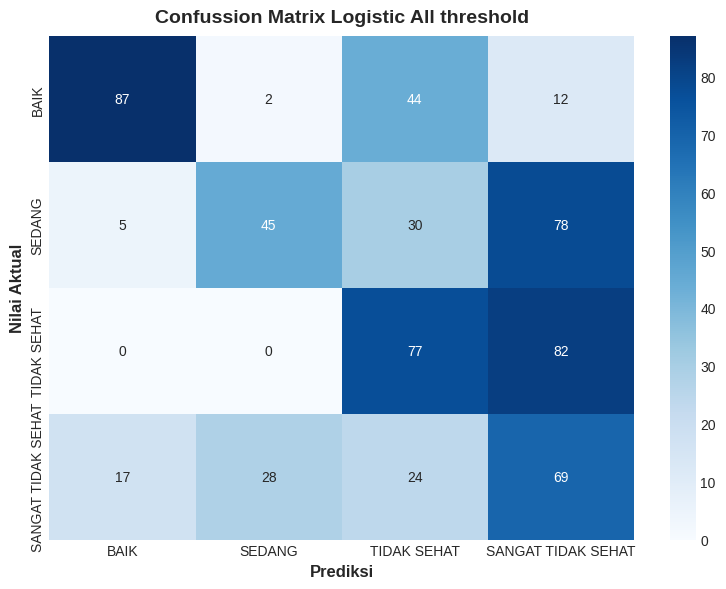

In [66]:
conf_matrix = confusion_matrix(y_test_mapped, ord_predictions_mapped)

# Plot matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confussion Matrix Logistic All threshold')
plt.show()

In [67]:
# Evaluasi model Ordinal Logistic Regression
ord_mse = mean_squared_error(y_test, ord_predictions)
ord_rmse = np.sqrt(ord_mse)
ord_mae = mean_absolute_error(y_test, ord_predictions)

print(f'Ordinal Logistic Regression (AT)MSE: {ord_mse}')
print(f'Ordinal Logistic Regression (AT)RMSE: {ord_rmse}')
print(f'Ordinal Logistic Regression (AT)MAE: {ord_mae}')

Ordinal Logistic Regression (AT)MSE: 0.925
Ordinal Logistic Regression (AT)RMSE: 0.9617692030835673
Ordinal Logistic Regression (AT)MAE: 0.6583333333333333


In [46]:
# Ordinal Logistic Regression (LogisticIT)
ord_model_it = LogisticIT(alpha=1)
ord_model_it.fit(X_train_scaled, y_train)
ord_predictions = ord_model_it.predict(X_test_scaled)

In [47]:
class_mapping = {
    0: 'BAIK',
    1: 'SEDANG',
    2: 'TIDAK SEHAT',
    3: 'SANGAT TIDAK SEHAT',
}
y_test_mapped = [class_mapping[label] for label in y_test]
ord_predictions_it_mapped = [class_mapping[label] for label in ord_predictions]

# Menampilkan laporan evaluasi model dengan label kategori yang baru
print("Laporan Evaluasi Model Ordinal Logistic Regression (IT):")
print(classification_report(y_test_mapped, ord_predictions_it_mapped))
print("\nOrdinal Logistic Regression Model (IT):")
print("Accuracy:", accuracy_score(y_test, ord_predictions))

Laporan Evaluasi Model Ordinal Logistic Regression (IT):
                    precision    recall  f1-score   support

              BAIK       0.72      0.87      0.79       145
SANGAT TIDAK SEHAT       0.41      0.60      0.49       158
            SEDANG       0.00      0.00      0.00       159
       TIDAK SEHAT       0.18      0.16      0.17       138

          accuracy                           0.41       600
         macro avg       0.33      0.41      0.36       600
      weighted avg       0.32      0.41      0.36       600


Ordinal Logistic Regression Model (IT):
Accuracy: 0.405


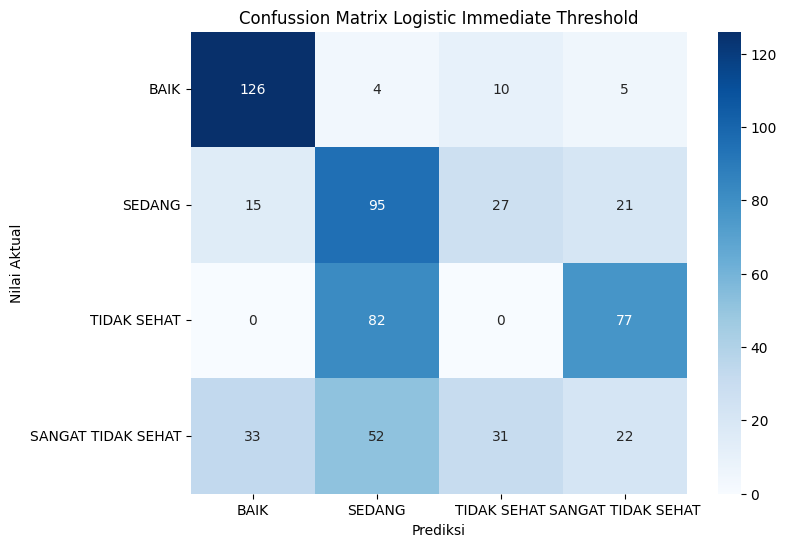

In [48]:
conf_matrix = confusion_matrix(y_test_mapped, ord_predictions_it_mapped)

# Plot matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confussion Matrix Logistic Immediate Threshold')
plt.show()

**Ordinal Logistic Regression (Immediate-Threshold variant)**

In [50]:
# Evaluasi model Ordinal Logistic Regression
ord_mse = mean_squared_error(y_test, ord_predictions)
ord_rmse = np.sqrt(ord_mse)
ord_mae = mean_absolute_error(y_test, ord_predictions)

print(f'Ordinal Logistic Regression (IT)MSE: {ord_mse}')
print(f'Ordinal Logistic Regression (IT)RMSE: {ord_rmse}')
print(f'Ordinal Logistic Regression (IT)MAE: {ord_mae}')

Ordinal Logistic Regression (IT)MSE: 1.5833333333333333
Ordinal Logistic Regression (IT)RMSE: 1.2583057392117916
Ordinal Logistic Regression (IT)MAE: 0.9033333333333333


**Uji Hipotesis**

In [52]:
import statsmodels.api as sm
X = sm.add_constant(X)
ord_model = sm.OLS(y_train, X_train_scaled).fit()

#uji t dan p-value
t_values = ord_model.tvalues
p_values = ord_model.pvalues

In [54]:
import statsmodels.api as sm

for i, feature in enumerate(features):
    print(f"Fitur '{feature}':")
    print(f"  t-value: {t_values[i]:.4f}")
    print(f"  p-value: {p_values[i]:.4f}")
    if p_values[i] < 0.05:
        print("  Hipotesis nol ditolak: Koefisien signifikan")
    else:
        print("  Tidak cukup bukti untuk menolak hipotesis nol")

Fitur 'pm10':
  t-value: 1.1275
  p-value: 0.2597
  Tidak cukup bukti untuk menolak hipotesis nol
Fitur 'pm25':
  t-value: -2.3697
  p-value: 0.0179
  Hipotesis nol ditolak: Koefisien signifikan
Fitur 'so2':
  t-value: 8.4354
  p-value: 0.0000
  Hipotesis nol ditolak: Koefisien signifikan
Fitur 'co':
  t-value: 8.5733
  p-value: 0.0000
  Hipotesis nol ditolak: Koefisien signifikan
Fitur 'o3':
  t-value: 1.8482
  p-value: 0.0648
  Tidak cukup bukti untuk menolak hipotesis nol
Fitur 'no2':
  t-value: 3.2729
  p-value: 0.0011
  Hipotesis nol ditolak: Koefisien signifikan


**Hasil Model**

In [57]:
ord_model = sm.OLS(y_train, X_train_scaled)
result = ord_model.fit()

# Estimasi parameter
print(result.summary())
params = result.params
print("\nParameters (Coefficients) dari model:")
print(params)

# Ekstraksi standar error
std_errors = result.bse
print("\nStandard errors of the coefficients:")
print(std_errors)

# Ekstraksi z-scores
z_scores = result.tvalues
print("\nZ-scores of the coefficients:")
print(z_scores)

# Ekstraksi p-values
p_values = result.pvalues
print("\nP-values of the coefficients:")
print(p_values)

                                 OLS Regression Results                                
Dep. Variable:       kategori_encoded   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):              0.112
Method:                 Least Squares   F-statistic:                              30.46
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                    1.73e-34
Time:                        01:19:05   Log-Likelihood:                         -2772.5
No. Observations:                1400   AIC:                                      5557.
Df Residuals:                    1394   BIC:                                      5588.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
# Melakukan prediksi menggunakan model OLS pada data pengujian
y_pred = result.predict(X_test)

# Mengubah hasil prediksi menjadi label kategori dengan melakukan pembulatan
predicted_labels = y_pred.round().astype(int)

# Menampilkan label kategori
print("Label Kategori yang Diprediksi:")
print(predicted_labels)

Label Kategori yang Diprediksi:
323      8
684     19
326      9
1710    16
1286    23
        ..
1396    -6
1397    -8
1774    20
1715    10
524      4
Length: 600, dtype: int64


- R-squared mengukur seberapa baik model cocok dengan data. Nilainya adalah proporsi variasi dalam variabel target yang dapat dijelaskan oleh model. Nilai R-squared yang diberikan adalah sebesar 0.403, yang berarti sekitar 40.3% variasi dalam kategori polusi udara dapat dijelaskan oleh model.

- F-statistic digunakan untuk menguji keseluruhan signifikansi model. Nilainya adalah sebesar 203.1 dengan p-value yang sangat rendah (4.22e-198), menunjukkan bahwa model secara keseluruhan signifikan.

- P-value mengukur signifikansi statistik dari koefisien. Nilai p-value yang rendah (bias < 0.05) menunjukkan bahwa koefisien tersebut secara signifikan berbeda dari nol.

- Dalam fitur di atas, fitur pm25, so2, co, o3, dan no2 memiliki p-value yang rendah, menunjukkan bahwa mereka memiliki pengaruh yang signifikan terhadap kategori polusi udara.

logit(P(Y ≤ n )) = β01.X1 + β02.X2 +...+ β0p.Xp

Probabilitas untuk masing-masing kategori:
𝑃(𝑌=𝑘)=𝑃(𝑌≤𝑘)−𝑃(𝑌≤𝑘−1) P(Y=k)=P(Y≤k)−P(Y≤k−1) untuk 𝑘=1,2,...,𝐾−1



**Tes ANOVA**

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# prepare data untuk ANOVA
dfcopy = train_df_resampled.copy()
dfcopy.rename(columns={'kategori': 'kategori'}, inplace=True)

# Encode categorical target variable
dfcopy['kategori_encoded'] = le.fit_transform(dfcopy['kategori'])

# ANOVA model
model = ols('kategori_encoded ~ pm10 + pm25 + so2 + co + o3 + no2', data=dfcopy).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)


               sum_sq      df           F        PR(>F)
pm10         3.628344     1.0    4.280205  3.868737e-02
pm25        23.473815     1.0   27.691072  1.576175e-07
so2        312.205488     1.0  368.295676  1.858302e-75
co         317.149062     1.0  374.127403  1.580327e-76
o3          21.192555     1.0   24.999965  6.234824e-07
no2         44.345920     1.0   52.313015  6.717017e-13
Residual  1689.472827  1993.0         NaN           NaN


Berdasarkan hasil ANOVA ini
semua polutan yang diuji (PM10, PM2.5, SO2, CO, O3, dan NO2) memiliki pengaruh yang signifikan terhadap kualitas udara. CO dan SO2 menunjukkan pengaruh yang sangat kuat, diikuti oleh NO2, PM2.5, O3, dan PM10. Nilai P yang sangat kecil menguatkan kesimpulan bahwa polutan ini berdampak signifikan terhadap kualitas udara.

**Mutual Information**

<ipython-input-62-02b6496932a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Mutual Information Scores
pm25    1.574294
pm10    0.961910
so2     0.701255
co      0.640135
o3      0.576799
no2     0.554455
Name: MI Scores, dtype: float64


<Figure size 1000x600 with 0 Axes>

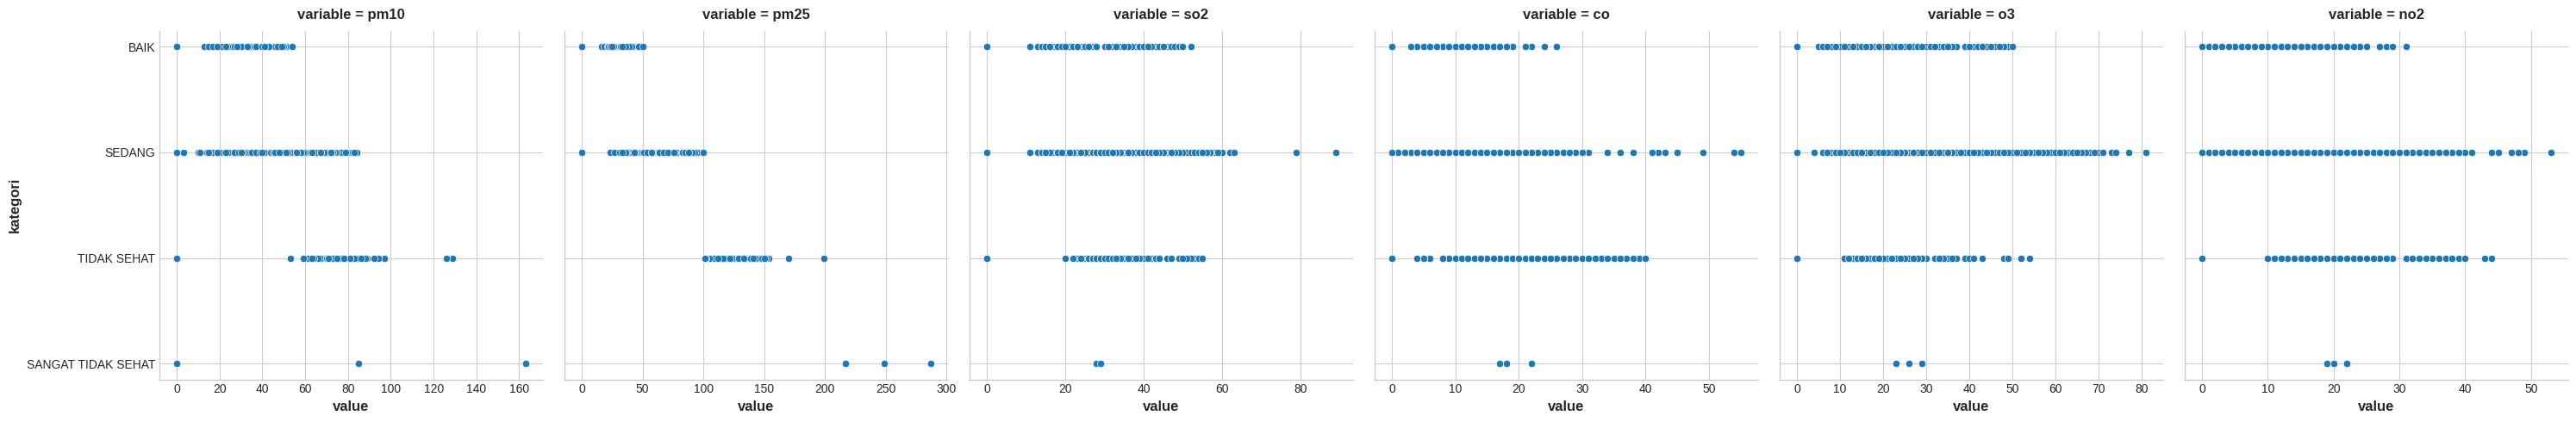

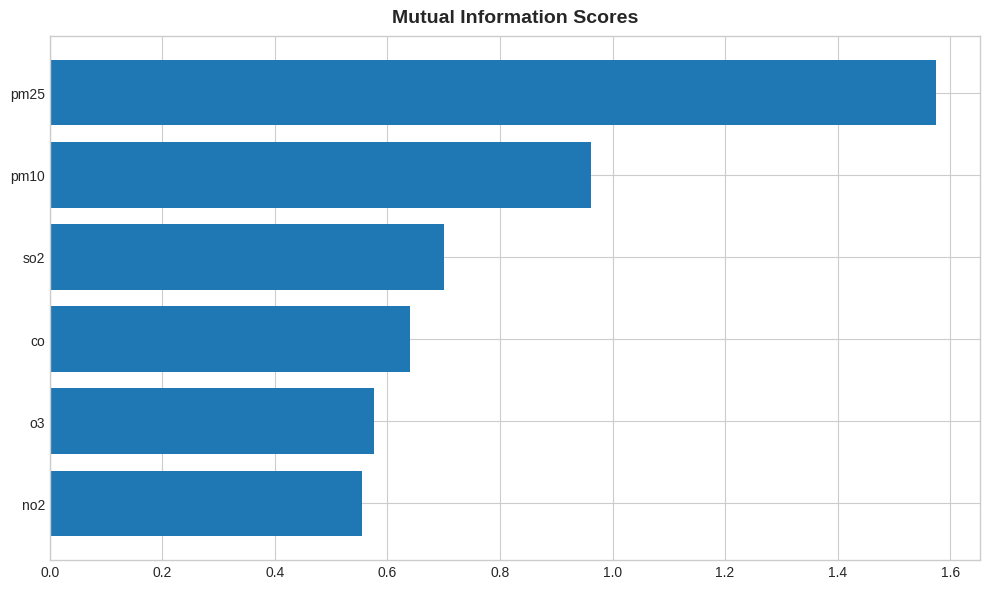

In [62]:
from sklearn.feature_selection import mutual_info_regression

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# fungsi utility
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Extracting relevant features and target variable
features = ["pm10", "pm25", "so2", "co", "o3", "no2"]
target = "kategori"

# Calculating Mutual Information Scores
mi_scores = make_mi_scores(train_df_resampled[features], train_df_resampled['kategori_encoded'])

# Plotting Heart Disease relative to each variable
plt.figure(figsize=(10, 6))
sns.relplot(
    x="value", y=target, col="variable", data=df.melt(id_vars=target, value_vars=features), facet_kws=dict(sharex=False),
);

# Plot of the Mutual Information Scores
plt.figure(figsize=(10, 6))
plot_mi_scores(mi_scores.head(20))

# Print the Mutual Information Scores
print("Mutual Information Scores")
print(mi_scores.head(20))